In [2]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
fantasy_f = "actually_final_i_promise.csv"

In [4]:
df = pd.read_csv(fantasy_f)

In [5]:
result = {}
for each in df["college"].unique():
    result[each] = {}
    ball = df.loc[df["college"] == each]
    result[each]["playercount"] = len(ball["name"].unique())
    result[each]["average score"] = ball["total annual points"].sum()
result = pd.DataFrame(result).transpose()

In [6]:
result.rename(columns={'average score': 'total points'}, inplace=True)
result.loc[result["playercount"]>30]

,total points,playercount
Tennessee,15253.06,39.0
Michigan,11743.12,43.0
Ohio State,8914.76,49.0
Penn State,6694.88,43.0
UCLA,3105.04,31.0
Florida,10727.48,48.0
Alabama,6640.36,32.0
Wisconsin,6991.22,41.0
California,11930.40,35.0
Stanford,6045.58,41.0


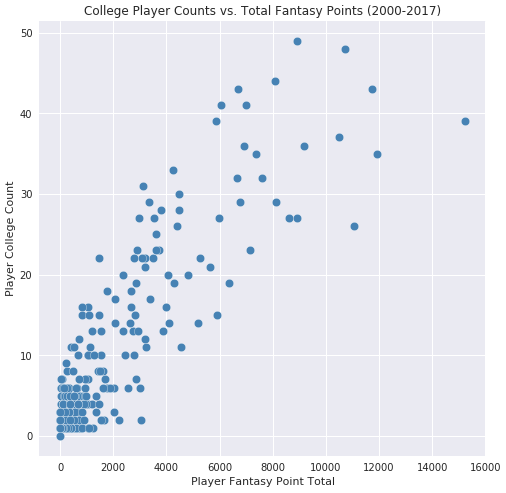

In [20]:
x = result["average score"]
y = result["playercount"]
with plt.style.context("seaborn"):
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
    plt.ylabel("Player College Count")
    plt.xlabel("Player Fantasy Point Total")
    plt.title("College Player Counts vs. Total Fantasy Points (2000-2017)")
    plt.savefig("FF Scatter.png")

In [7]:
X = x.values.reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

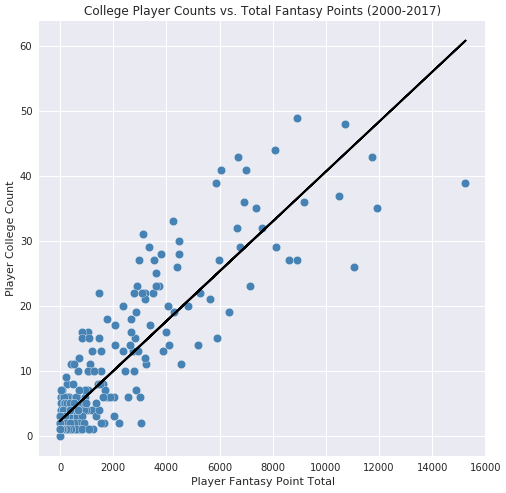

In [18]:
with plt.style.context("seaborn"):
    plt.figure(figsize=(8,8))
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    plt.ylabel("Player College Count")
    plt.xlabel("Player Fantasy Point Total")
    plt.title("College Player Counts vs. Total Fantasy Points (2000-2017)")
    plt.savefig("FF Scatter Regression.png")

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [18]:
m = model.coef_[0]

In [20]:
print("slope=",m)

slope= 0.0038366969217760714


1 player is equal to about 260 pts. over this timespan.